# Challenge Question #2

In [105]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

pd.set_option('notebook_repr_html', True)
pd.set_option('display.mpl_style', 'default') 

import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")
pd.set_option('precision', 10)
print('done!')

done!


### Load dataset

In [43]:
# Load dataset as pandas dataframe
# dates_toparse = ['Created Date', 'Closed Date', 'Due Date', 'Resolution Action Updated Date']
# data_url = 'https://s3.amazonaws.com/thedataincubator-challenge/nyc311calls.csv.gz'
data_url = '../_datasets_downloads/nyc311calls.csv.gz'
nyc_complaints = pd.read_csv(data_url, compression='gzip', dtype='unicode', index_col='Unique Key')

nyc_complaints[['Latitude','Longitude']] = nyc_complaints[['Latitude','Longitude']].astype(float)
print("Dataset inported successfully!")


Dataset inported successfully!


In [3]:
# Over 1 million data elements!
total_complaints = nyc_complaints.shape

In [8]:
nyc_complaints.columns;
nyc_complaints.head(1)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
31677783,10/05/2015 11:56:00 PM,10/05/2015 11:56:00 PM,DSNY,Queens East 12,Derelict Vehicles,14 Derelict Vehicles,Street,11436,128-25 149 STREET,149 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6712004682,-73.7894667341,"(40.671200468216696, -73.78946673414393)"


/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


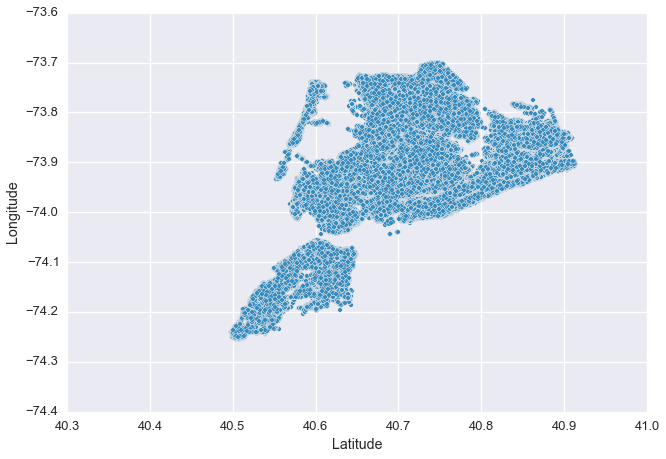

In [121]:

nyc_comp = nyc_complaints[['Latitude', 'Longitude']]

nyc_comp = nyc_comp.dropna()

nyc_comp.plot(x='Latitude', y='Longitude', kind='scatter', xlim=(40.3, 41), ylim=(-74.4,-73.6))


### Q2.a   What fraction of complaints are associated with the 2nd most popular agency?

Let the 2nd most popular `Agency` be `X`. We filter the `Complaint Type` based on the `Agency X` and then count the value as `Y`. Let `Total_Complaints` be `Z`. Then the response to $Q2a = \frac{Y(X)}{Z}$



 Fraction of complaint associated with 2nd most popular agency 'DOT' is 0.17193141


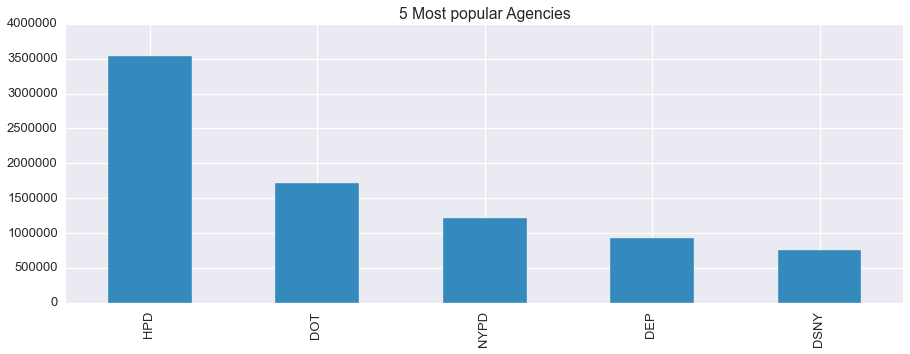

In [9]:
# Extract top 5 agencies and plot it.
top_agencies = nyc_complaints.Agency.value_counts(ascending=False)[:5]
top_agencies.plot(kind='bar', title='5 Most popular Agencies', figsize=(15,5))

# Compute fraction of complaint associated with 2nd most popular agency.
complaint_fractn = top_agencies[1] / total_complaints[0]
print("\n\n Fraction of complaint associated with 2nd most popular agency '%s' is %10.8f" 
      %(top_agencies.index[1], complaint_fractn))

### Q2.b   What is the distance (in degrees) between the 90% and 10% percentiles of degrees latitude?

Filter the `Latitude` column in the dataset. Let $ X = 90\%$ while $Y = 10\%$. X and Y (deg). Then $Q2b = Y - X$.



Latitude Distance between 90% and 10% is 0.23579083 (deg)


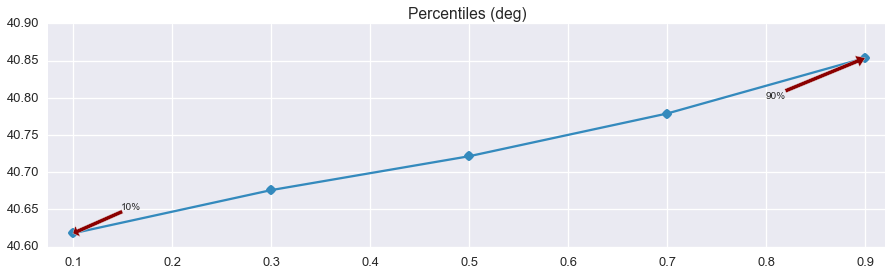

In [10]:
# Take the Latitude column, remove NaN entries and get the frequency counts.
all_lats = nyc_complaints.Latitude.dropna()

pctiles_points = all_lats.quantile([.1, .3, .5, .7, .9])
ax = pctiles_points.plot(kind='line', marker='o', figsize=(15,4), 
                         title='Percentiles (deg)', xlim=(0.075,0.92))

loc1 = (0.1, pctiles_points[0.1])
loc9 = (0.9, pctiles_points[0.9])

ax.annotate('10%', xy=loc1, xytext=(0.15, 40.65), arrowprops=dict(facecolor='darkred'))
ax.annotate('90%', xy=loc9, xytext=(0.80, 40.80), arrowprops=dict(facecolor='darkred'))
print("\n\nLatitude Distance between 90%% and 10%% is %10.8f (deg)" 
      % (pctiles_points[0.9] - pctiles_points[0.1]))


### Q2.c   What is the difference between the expected number of calls received during the most and least popular whole hours of the day? 

#### We define `(whole hours of day)` as `Created Date` when minutes is `00` e.g. `01:00:58, 22:00:00, 19:00:49`, etc



00-hours is an OUTLIER. We can safely assume these calls are not accurately reported.


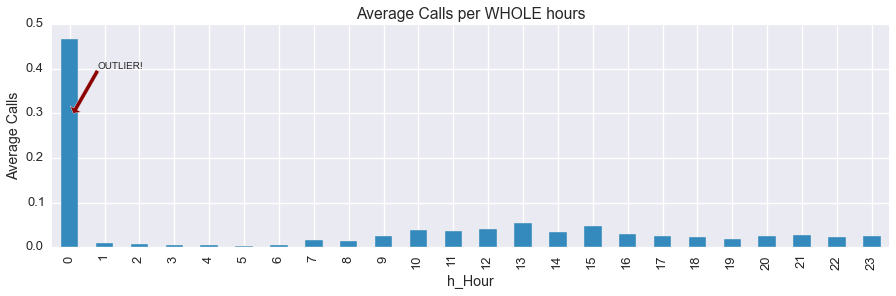

In [12]:
# Extract time.
all_time = pd.DatetimeIndex(nyc_complaints['Created Date'][:50000])
whole_time = all_time[(all_time.minute==0)].hour

# Determine the frequencies
whole_time = pd.DataFrame(whole_time, columns=['h_Hour'])
whole_time_freq = pd.DataFrame(whole_time.h_Hour.value_counts())
whole_time_freq['Expect'] = whole_time_freq.h_Hour / whole_time.size

# Format the dataframe
whole_time_freq.columns = [['Frequency','Expectations']] 
whole_time_freq.sort_index(inplace=True)
whole_time_freq.index.name = 'h_Hour'

# Plot the average calls per whole hours
ax = whole_time_freq.Expectations.plot(kind='bar', figsize=(15,4),
                                       title='Average Calls per WHOLE hours')
ax.set_ylabel('Average Calls')
print("\n\n00-hours is an OUTLIER. We can safely assume these calls are not accurately reported.")

ax.annotate('OUTLIER!', xy=(0.1,0.3), xytext=(0.8, 0.4), arrowprops=dict(facecolor='darkred'))


## We can safely remove calls at `00-hour`. It appears very `suspicious`

        Frequency  Expectations
h_Hour                         
5               5  0.0063051702
        Frequency  Expectations
h_Hour                         
13             82  0.1034047919


Difference between expected number of calls :0.09709962 


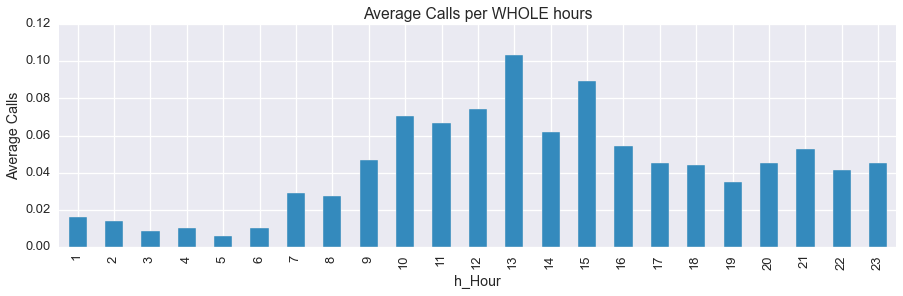

In [14]:
whole_time_freq = whole_time_freq[whole_time_freq.index!=0]
whole_time_freq['Expectations'] = whole_time_freq.Frequency / whole_time_freq.Frequency.sum()

most_pop_hr = whole_time_freq.Expectations.max()
least_pop_hr = whole_time_freq.Expectations.min()
expc_diff = most_pop_hr - least_pop_hr

is_min = whole_time_freq.Expectations == least_pop_hr
print(whole_time_freq[is_min])

is_max = whole_time_freq.Expectations == most_pop_hr
print(whole_time_freq[is_max])

print("\n\nDifference between expected number of calls :%10.8f " %expc_diff)

# Plot the average calls per whole hours
ax = whole_time_freq.Expectations.plot(kind='bar', figsize=(15,4),
                                       title='Average Calls per WHOLE hours')
ax.set_ylabel('Average Calls')


## What is the most `surprising` complaint type when conditioned on a borough?

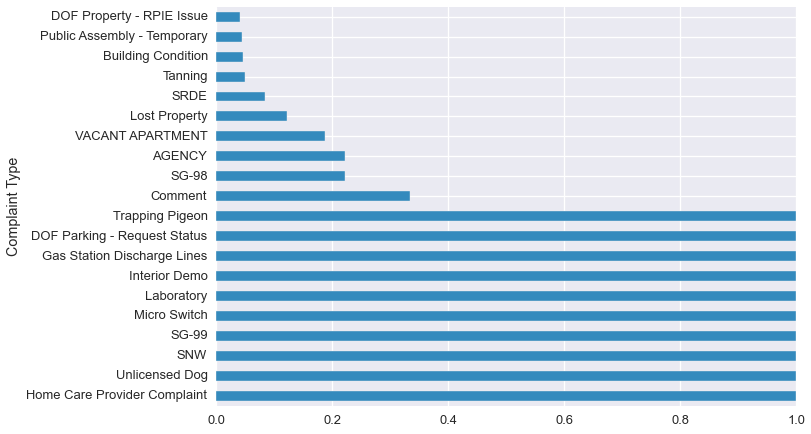

In [259]:
# nyc_complaints.columns
dataelemt = nyc_complaints[['Complaint Type', 'Borough']]

# Pivot the table, construct the frequency and add a running row and column totals
# grped_data = pd.pivot_table(dataelemt, index='Borough', columns='Complaint Type', aggfunc=len, margins=True).fillna(0)

# Alternatively... 
grped_data = pd.crosstab(dataelemt.Borough, dataelemt['Complaint Type'], margins=True)


table_trans = grped_data.apply(lambda r: r/r[-1], axis=0)
pr_complaint_types = grped_data.ix['All'] / grped_data.All.ix[-1]
hiest_pr_complaint_at_location = table_trans[:-1].apply(max)
ratios = hiest_pr_complaint_at_location / pr_complaint_types


ratios = ratios / max(ratios)
# Ratios of top 20 complaints types conditioned on Buroughs
ratios.sort_values(ascending=False)[:20].plot(kind='barh')


## Q2.e   What is the standard deviation in seconds of the time between consecutive calls?

In [ ]:
all_time = all_time.sort_values(ascending=True)
date_range = pd.date_range(all_time.min(), periods=all_time.size, freq='T', name='Date_Range')

date_range

In [ ]:

time_hack = pd.DataFrame()
time_hack['Date'] = all_time.date
time_hack['time'] = all_time.time
# time_hack['hours'] = all_time.hour
# time_hack['mins'] = all_time.minute
# time_hack['sec'] = all_time.second

time_hack.head(10);